# Intro to Deep Learning (emphasis on Supervised Learning)
## Deep RL Bootcamp - Florida International University
### Miguel Alonso Jr - Associate Professor of Computer Science
October 2019
<center><img src="https://miro.medium.com/max/2000/1*goFgCUHprcroxSLZvROjpg.jpeg" width=250></center>

# What is Deep Learning

- Subset of Machine Learning (which itself is a subset of Artificial Intelligence)
- Machine Learning - set of algorithms that process data, learn from the data, and then use what is learned to make intelligent decisions.
- So what's the difference?
    - Deep Learning learns to represent the world (using data) as a nested hierarchy of concepts
    - Each "concept" is defined in relation to simpler "concepts"
    - Abstract representations arise from less abstract ones


# Intuitive description of DL

You can think of DL as a way to represent information as a series of complex abstraction.

<center><img src="https://miro.medium.com/max/672/1*KYUUg9JC6InYe-VNPMDzAA.png"></center>

(Source: [Towards Datascience](https://towardsdatascience.com/why-deep-learning-is-needed-over-traditional-machine-learning-1b6a99177063))

# Interest over time: DL, AI, and ML (2004 - 2019)
![Search terms: DL, AI, and ML](https://miro.medium.com/max/1156/1*vd96L7Rv1-yCkqlLOGq7mg.png)
(Source: [Medium](https://medium.com/datadriveninvestor/bootstrapping-your-machine-learning-journey-f339e011c6b6))

# Last five years...
![Last 5 years](https://miro.medium.com/max/1154/1*KMm54RZ5hVToYgaXfNELiQ.png)
(Source: [Medium](https://medium.com/datadriveninvestor/bootstrapping-your-machine-learning-journey-f339e011c6b6))

# Tradional ML pipeline - Example: Classifier

<center><img src="https://www.guru99.com/images/tensorflow/083018_0454_MachineLear3.png"></center>

(Source: [Guru99](https://www.guru99.com/machine-learning-vs-deep-learning.html))

# DL pipeline - Example: Classifier

<center><img src="https://www.guru99.com/images/tensorflow/083018_0454_MachineLear4.png"></center>

(Source: [Guru99](https://www.guru99.com/machine-learning-vs-deep-learning.html))

# Traditional Machine Learning vs DL
<center><img src="https://www.guru99.com/images/tensorflow/083018_0454_MachineLear5.png" width=500></center>

(Source:[Guru99](https://www.guru99.com/machine-learning-vs-deep-learning.html))

- Old dog, new tricks
- 2009 - Throw lots of data and lots of compute (i.e. GPUs) towards Artificial Neural Networks and boom!
- How to make models better: more compute and more data

<center><img src="https://miro.medium.com/max/1218/1*mVVglaFUwRz-HkcMlLyvgg.jpeg" width=800></center>

(Source: [Towards Datascience](https://towardsdatascience.com/why-deep-learning-is-needed-over-traditional-machine-learning-1b6a99177063))

<center>
<img src="https://miro.medium.com/max/693/1*ZX05x1xYgaVoa4Vn2kKS9g.png" width=800>
</center>

(Source: [Towards Datascience](https://towardsdatascience.com/why-deep-learning-is-needed-over-traditional-machine-learning-1b6a99177063S))

# Differences between ML and DL

|                       | Machine Learning Learning                                                                                  | Deep Learning                                                                                             |
|-----------------------|------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
| Data Dependencies     | Excellent performances on a small/medium dataset                                                           | Excellent performance on a big dataset                                                                    |
| Hardware dependencies | Work on a low-end machine.                                                                                 | Requires powerful machine, preferably with GPU: DL performs a significant amount of matrix multiplication |
| Feature engineering   | Need to understand the features that represent the data                                                    | No need to understand the best feature that represents the data                                           |
| Execution time        | From few minutes to hours                                                                                  | Up to weeks. Neural Network needs to compute a significant number of weights                              |
| Interpretability      | Some algorithms are easy to interpret (logistic, decision tree), some are almost impossible (SVM, XGBoost) | Difficult to impossible                                                                                   |


# Deep Learning Architectures

Many types of deep learning architectures: CNNs, RNNs, LSTMS, DBN, DSN, GRU, etc

- Convolutional NNs: Image recognition, semantic segmentation, object detection, control policy, video analysis, natural language processing
- Recurrent NNs: sequence data
        - LSTMs/GRUs: Natural language text compression, handwriting recognition, speech recognition, gesture recognition, image captioning

# Deep Learning Architectures (cont'd)

- Deep Belief N: Image recognition, information retrieval, natural language understanding, failure prediction
- Deep Stacking N: Information retrieval, continuous speech recognition

In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchviz import make_dot, make_dot_from_trace
import matplotlib.pyplot as plt
import numpy as np
# import wandb
# wandb.init(project="Deep-RL-BC-Session-2")

GPUS = 1
DEVICE = torch.device("cuda:0" if (torch.cuda.is_available() and GPUS > 0) else "cpu")

In [2]:
image_folder = './images'

trsfrm = transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5,), (1.0,))])

training_set = datasets.MNIST(root=image_folder, train=True, transform=trsfrm, download=True)
testing_set = datasets.MNIST(root=image_folder, train=False, transform=trsfrm, download=True)

batch_size = 64

training_loader = torch.utils.data.DataLoader(dataset=training_set,
                                              batch_size=batch_size,
                                              shuffle=True)

testing_loader = torch.utils.data.DataLoader(dataset=testing_set,
                                             batch_size=batch_size,
                                             shuffle=True)
dataiter = iter(training_loader)
images, labels = dataiter.next()
images.size()

# wandb.config.batch_size = batch_size

torch.Size([64, 1, 28, 28])

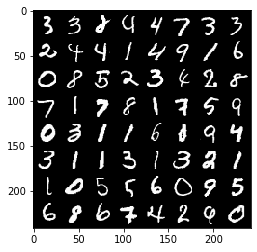

In [3]:
# let's take a look at the training data
image_grid = torchvision.utils.make_grid(images,normalize=True)
plt.imshow(np.transpose(image_grid.numpy(),(1,2,0)), interpolation='nearest')

In [51]:
class SoftmaxRegression(nn.Module):
    def __init__(self):
        super(SoftmaxRegression, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # this flattens the image into a vector
        x = self.fc1(x)
        return F.log_softmax(x, 1)
        
    
    def name(self):
        return "SoftmaxRegression"

In [52]:
# we need to instatiate the network and define the optimizer and loss
smr = SoftmaxRegression()
smr.to(device=DEVICE)
optimizer = optim.SGD(smr.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

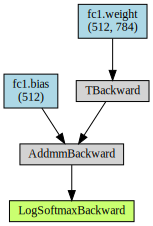

In [53]:
# let's visualize the network architecture
make_dot(smr(images.to(device=DEVICE)), params=dict(smr.named_parameters()))

In [54]:
# now let's train!

for epoch in range(20):
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    smr.train()
    for batch_idx, (x, target) in enumerate(training_loader):
        optimizer.zero_grad()
        out = smr(x.to(device=DEVICE))
        loss = criterion(out, target.to(device=DEVICE))
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
        correct_cnt += (pred_label == target.to(device=DEVICE)).sum().item()
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        loss.backward()
        optimizer.step()
        if (batch_idx + 1) % 100 == 0 or (batch_idx + 1) == len(training_loader):
            print('==>>> epoch: {}, batch index: {}, train loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx + 1, ave_loss, correct_cnt * 1.0 / total_cnt))

    # testing
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    smr.eval()
    for batch_idx, (x, target) in enumerate(testing_loader):
        out = smr(x.to(device=DEVICE))
        loss = criterion(out, target.to(device=DEVICE))
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
        #         print(target.data)
        correct_cnt += (pred_label == target.to(device=DEVICE)).sum().item()
        # smooth average
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1

        if (batch_idx + 1) % 100 == 0 or (batch_idx + 1) == len(testing_loader):
            print('==>>> epoch: {}, batch index: {}, test loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx + 1, ave_loss, correct_cnt * 1.0 / total_cnt))

==>>> epoch: 0, batch index: 100, train loss: 1.747986, acc: 0.446
==>>> epoch: 0, batch index: 200, train loss: 1.216145, acc: 0.597
==>>> epoch: 0, batch index: 300, train loss: 1.007843, acc: 0.663
==>>> epoch: 0, batch index: 400, train loss: 0.885285, acc: 0.702
==>>> epoch: 0, batch index: 500, train loss: 0.790445, acc: 0.727
==>>> epoch: 0, batch index: 600, train loss: 0.713073, acc: 0.747
==>>> epoch: 0, batch index: 700, train loss: 0.699475, acc: 0.761
==>>> epoch: 0, batch index: 800, train loss: 0.649839, acc: 0.772
==>>> epoch: 0, batch index: 900, train loss: 0.599870, acc: 0.781
==>>> epoch: 0, batch index: 938, train loss: 0.643617, acc: 0.784
==>>> epoch: 0, batch index: 100, test loss: 0.595461, acc: 0.867
==>>> epoch: 0, batch index: 157, test loss: 0.606379, acc: 0.864
==>>> epoch: 1, batch index: 100, train loss: 0.590692, acc: 0.864
==>>> epoch: 1, batch index: 200, train loss: 0.580722, acc: 0.862
==>>> epoch: 1, batch index: 300, train loss: 0.551967, acc: 0.8

==>>> epoch: 10, batch index: 400, train loss: 0.361566, acc: 0.903
==>>> epoch: 10, batch index: 500, train loss: 0.344880, acc: 0.903
==>>> epoch: 10, batch index: 600, train loss: 0.309416, acc: 0.903
==>>> epoch: 10, batch index: 700, train loss: 0.365258, acc: 0.903
==>>> epoch: 10, batch index: 800, train loss: 0.320906, acc: 0.903
==>>> epoch: 10, batch index: 900, train loss: 0.341671, acc: 0.903
==>>> epoch: 10, batch index: 938, train loss: 0.317066, acc: 0.903
==>>> epoch: 10, batch index: 100, test loss: 0.356324, acc: 0.909
==>>> epoch: 10, batch index: 157, test loss: 0.303693, acc: 0.909
==>>> epoch: 11, batch index: 100, train loss: 0.376656, acc: 0.910
==>>> epoch: 11, batch index: 200, train loss: 0.363194, acc: 0.905
==>>> epoch: 11, batch index: 300, train loss: 0.307322, acc: 0.907
==>>> epoch: 11, batch index: 400, train loss: 0.352828, acc: 0.906
==>>> epoch: 11, batch index: 500, train loss: 0.389332, acc: 0.906
==>>> epoch: 11, batch index: 600, train loss: 0.4

In [33]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self):
        super(MultiLayerPerceptron, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # this flattens the image into a vector
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, 1)

    def name(self):
        return "MultiLayerPerceptron"

In [34]:
# we need to instatiate the network and define the optimizer and loss
mlp = MultiLayerPerceptron()
mlp.to(device=DEVICE)
optimizer = optim.SGD(mlp.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

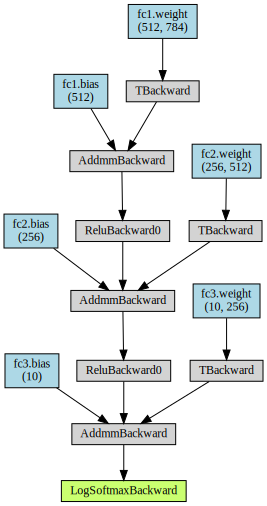

In [35]:
# let's visualize the network architecture
make_dot(mlp(images.to(device=DEVICE)), params=dict(mlp.named_parameters()))

In [14]:
# now let's train!

for epoch in range(20):
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    mlp.train()
    for batch_idx, (x, target) in enumerate(training_loader):
        optimizer.zero_grad()
        out = mlp(x.to(device=DEVICE))
        loss = criterion(out, target.to(device=DEVICE))
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
        correct_cnt += (pred_label == target.to(device=DEVICE)).sum().item()
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        loss.backward()
        optimizer.step()
        if (batch_idx + 1) % 100 == 0 or (batch_idx + 1) == len(training_loader):
            print('==>>> epoch: {}, batch index: {}, train loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx + 1, ave_loss, correct_cnt * 1.0 / total_cnt))

    # testing
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    mlp.eval()
    for batch_idx, (x, target) in enumerate(testing_loader):
        out = mlp(x.to(device=DEVICE))
        loss = criterion(out, target.to(device=DEVICE))
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
        #         print(target.data)
        correct_cnt += (pred_label == target.to(device=DEVICE)).sum().item()
        # smooth average
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1

        if (batch_idx + 1) % 100 == 0 or (batch_idx + 1) == len(testing_loader):
            print('==>>> epoch: {}, batch index: {}, test loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx + 1, ave_loss, correct_cnt * 1.0 / total_cnt))

==>>> epoch: 0, batch index: 100, train loss: 2.237775, acc: 0.277
==>>> epoch: 0, batch index: 200, train loss: 2.136729, acc: 0.350
==>>> epoch: 0, batch index: 300, train loss: 1.956810, acc: 0.420
==>>> epoch: 0, batch index: 400, train loss: 1.668826, acc: 0.473
==>>> epoch: 0, batch index: 500, train loss: 1.353518, acc: 0.516
==>>> epoch: 0, batch index: 600, train loss: 1.098740, acc: 0.551
==>>> epoch: 0, batch index: 700, train loss: 0.880058, acc: 0.583
==>>> epoch: 0, batch index: 800, train loss: 0.765013, acc: 0.609
==>>> epoch: 0, batch index: 900, train loss: 0.672770, acc: 0.632
==>>> epoch: 0, batch index: 938, train loss: 0.691014, acc: 0.640
==>>> epoch: 0, batch index: 100, test loss: 0.634412, acc: 0.820
==>>> epoch: 0, batch index: 157, test loss: 0.601172, acc: 0.825
==>>> epoch: 1, batch index: 100, train loss: 0.602201, acc: 0.832
==>>> epoch: 1, batch index: 200, train loss: 0.543346, acc: 0.837
==>>> epoch: 1, batch index: 300, train loss: 0.524357, acc: 0.8

==>>> epoch: 10, batch index: 400, train loss: 0.224081, acc: 0.935
==>>> epoch: 10, batch index: 500, train loss: 0.237758, acc: 0.936
==>>> epoch: 10, batch index: 600, train loss: 0.217081, acc: 0.936
==>>> epoch: 10, batch index: 700, train loss: 0.223047, acc: 0.936
==>>> epoch: 10, batch index: 800, train loss: 0.214435, acc: 0.936
==>>> epoch: 10, batch index: 900, train loss: 0.235848, acc: 0.936
==>>> epoch: 10, batch index: 938, train loss: 0.215291, acc: 0.937
==>>> epoch: 10, batch index: 100, test loss: 0.230074, acc: 0.937
==>>> epoch: 10, batch index: 157, test loss: 0.196517, acc: 0.939
==>>> epoch: 11, batch index: 100, train loss: 0.208504, acc: 0.941
==>>> epoch: 11, batch index: 200, train loss: 0.209451, acc: 0.942
==>>> epoch: 11, batch index: 300, train loss: 0.180619, acc: 0.942
==>>> epoch: 11, batch index: 400, train loss: 0.190278, acc: 0.942
==>>> epoch: 11, batch index: 500, train loss: 0.219291, acc: 0.942
==>>> epoch: 11, batch index: 600, train loss: 0.1

In [36]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [37]:
convnet = ConvNet()
convnet.to(device=DEVICE)
optimizer = optim.SGD(convnet.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

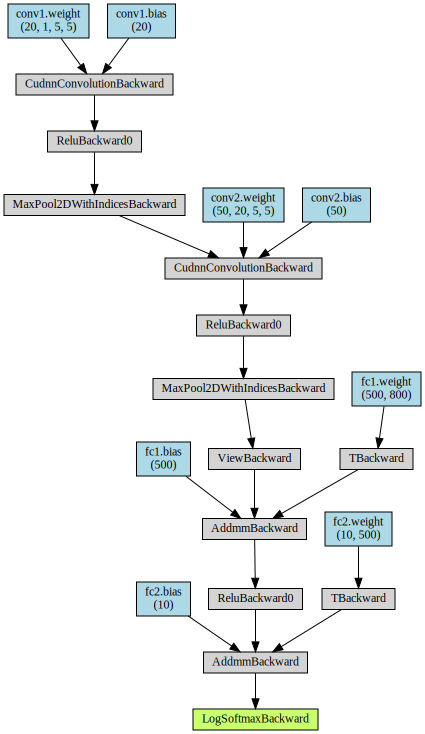

In [38]:
# let's visualize the network architecture
make_dot(convnet(images.to(device=DEVICE)), params=dict(convnet.named_parameters()))

In [16]:
for epoch in range(20):
    #training

    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    convnet.train()
    for batch_idx, (x, target) in enumerate(training_loader):
        x, target = x.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        out = convnet(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
        correct_cnt += (pred_label == target).sum().item()
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        loss.backward()
        optimizer.step()
        if (batch_idx + 1) % 100 == 0 or (batch_idx + 1) == len(training_loader):
            print('==>>> epoch: {}, batch index: {}, train loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx + 1, ave_loss, correct_cnt * 1.0 / total_cnt))


    # testing
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    convnet.eval()
    for batch_idx, (x, target) in enumerate(testing_loader):
        x, target = x.to(DEVICE), target.to(DEVICE)
        out = convnet(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
        #         print(target.data)
        correct_cnt += (pred_label == target).sum().item()
        # smooth average
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1

        if (batch_idx + 1) % 100 == 0 or (batch_idx + 1) == len(testing_loader):
            print('==>>> epoch: {}, batch index: {}, test loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx + 1, ave_loss, correct_cnt * 1.0 / total_cnt))

==>>> epoch: 0, batch index: 100, train loss: 2.258740, acc: 0.181
==>>> epoch: 0, batch index: 200, train loss: 2.172461, acc: 0.334
==>>> epoch: 0, batch index: 300, train loss: 1.941946, acc: 0.423
==>>> epoch: 0, batch index: 400, train loss: 1.214224, acc: 0.495
==>>> epoch: 0, batch index: 500, train loss: 0.627786, acc: 0.560
==>>> epoch: 0, batch index: 600, train loss: 0.497010, acc: 0.610
==>>> epoch: 0, batch index: 700, train loss: 0.351145, acc: 0.649
==>>> epoch: 0, batch index: 800, train loss: 0.303818, acc: 0.681
==>>> epoch: 0, batch index: 900, train loss: 0.336966, acc: 0.706
==>>> epoch: 0, batch index: 938, train loss: 0.315337, acc: 0.714
==>>> epoch: 0, batch index: 100, test loss: 0.257275, acc: 0.911
==>>> epoch: 0, batch index: 157, test loss: 0.285459, acc: 0.915
==>>> epoch: 1, batch index: 100, train loss: 0.271393, acc: 0.914
==>>> epoch: 1, batch index: 200, train loss: 0.250423, acc: 0.919
==>>> epoch: 1, batch index: 300, train loss: 0.233131, acc: 0.9

==>>> epoch: 10, batch index: 400, train loss: 0.058421, acc: 0.984
==>>> epoch: 10, batch index: 500, train loss: 0.050921, acc: 0.984
==>>> epoch: 10, batch index: 600, train loss: 0.056675, acc: 0.984
==>>> epoch: 10, batch index: 700, train loss: 0.039574, acc: 0.984
==>>> epoch: 10, batch index: 800, train loss: 0.041488, acc: 0.984
==>>> epoch: 10, batch index: 900, train loss: 0.038364, acc: 0.984
==>>> epoch: 10, batch index: 938, train loss: 0.055384, acc: 0.984
==>>> epoch: 10, batch index: 100, test loss: 0.050347, acc: 0.985
==>>> epoch: 10, batch index: 157, test loss: 0.042828, acc: 0.986
==>>> epoch: 11, batch index: 100, train loss: 0.043413, acc: 0.988
==>>> epoch: 11, batch index: 200, train loss: 0.078500, acc: 0.987
==>>> epoch: 11, batch index: 300, train loss: 0.036209, acc: 0.987
==>>> epoch: 11, batch index: 400, train loss: 0.039824, acc: 0.987
==>>> epoch: 11, batch index: 500, train loss: 0.046432, acc: 0.987
==>>> epoch: 11, batch index: 600, train loss: 0.0

# Lab 2 - Develop a CNN to classify the Fashion-MNIST dataset!

Congratulations! You've made it to the end of module 2. Your task for Lab 2 is to develop an Artificial Neural Network to classify the Fashion-MNIST dataset that achieves at least 92.5% accuracy on test data. The dataset is available through torchvision. As we did before, train a classic softmax regression network and a simple Multi-layer Perceptron as baselines. You can find a list of networks that have been applied to the Fashion MNIST dataset [here](https://github.com/zalandoresearch/fashion-mnist)